In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('customers.csv')
data.drop(['Region','Channel'],axis = 1,inplace = True)
print ('{} data entries with {} features was passed'.format(data.shape[0],data.shape[1]))

440 data entries with 6 features was passed


In [3]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
data.loc[[35,62,369]]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
35,688,5491,11091,833,4239,436
62,7823,6245,6544,4154,4074,964
369,6211,337,683,1089,41,296


In [5]:
sample = pd.DataFrame(data.loc[[34,266,82]],columns = data.keys()).reset_index(drop = True)

In [6]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
new_data = data.drop('Frozen', axis = 1,inplace = False)
X_train,X_test,y_train,y_test = train_test_split(new_data,data['Frozen'],test_size = 0.25,random_state = 1)
regressor = DecisionTreeRegressor()
regressor = regressor.fit(X_train,y_train)
prediction = regressor.predict(X_test)
score = r2_score(y_test,prediction)

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
def feature_relevence(data):
    score = {}
    for feature in data.columns.values:
        new_data = data.drop(feature,axis = 1,inplace = False)
        X_train,X_test,y_train,y_test = train_test_split(new_data,data[feature],test_size = 0.25,random_state = 1)
        regressor = DecisionTreeRegressor()
        regressor = regressor.fit(X_train,y_train)
        prediction = regressor.predict(X_test)
        score[feature] = r2_score(y_test,prediction)
    return score

In [8]:
feature_relevence(data)

{'Delicatessen': -1.4382155393088736,
 'Detergents_Paper': 0.80437231124036157,
 'Fresh': -0.47992027381847002,
 'Frozen': -0.6148696427254392,
 'Grocery': 0.81190297618927643,
 'Milk': 0.47848954179039516}

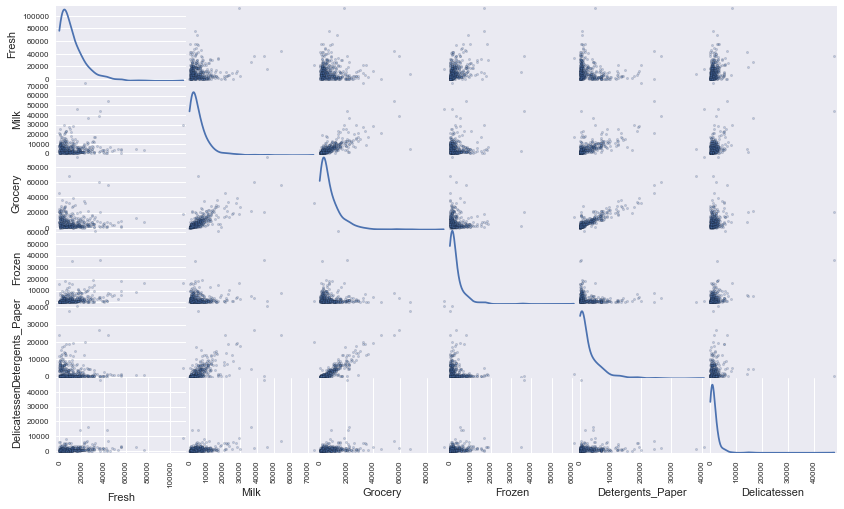

In [9]:
pd.scatter_matrix(data,alpha = 0.3, figsize = (14,8),diagonal = 'kde')
plt.show()

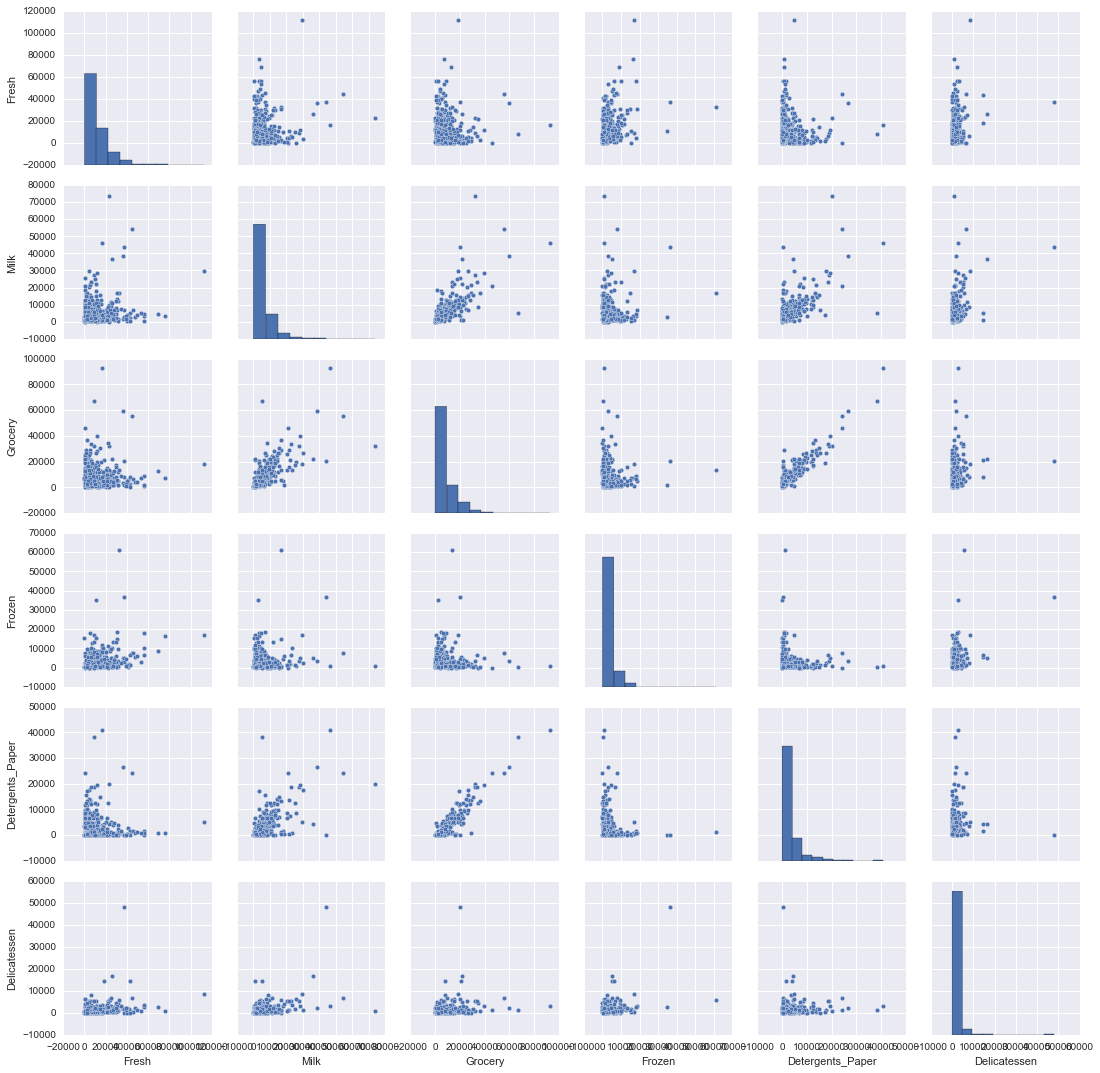

In [10]:
sns.pairplot(data)

In [11]:
log_data = data.apply(np.log)

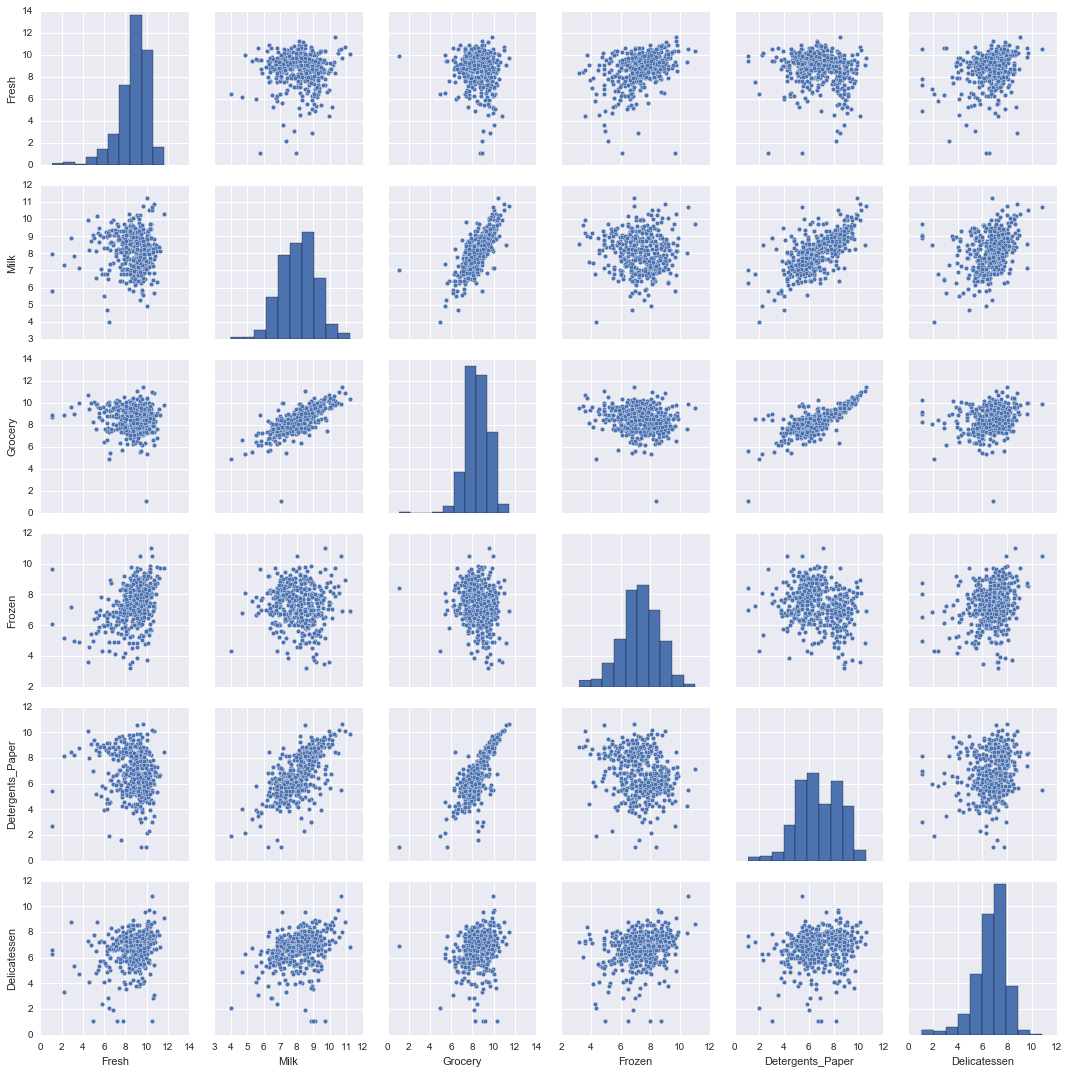

In [12]:
sns.pairplot(log_data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a3b2b70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11bfe4048>]], dtype=object)

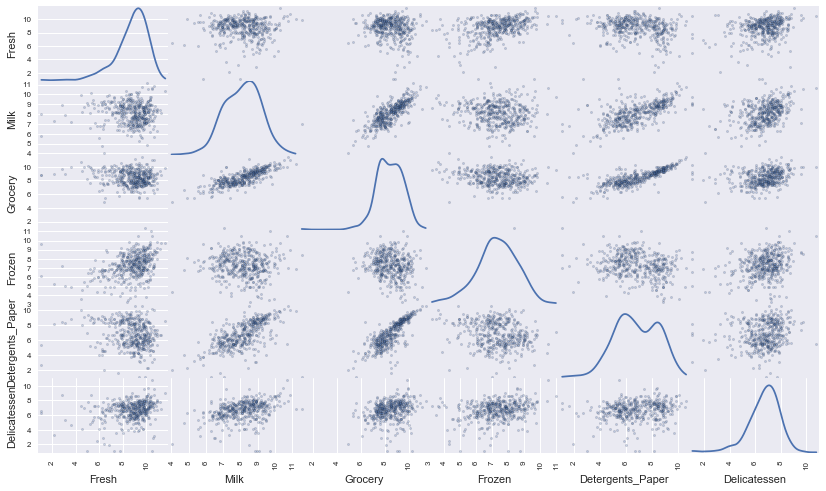

In [13]:
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

In [14]:
outliers = []
for feature in log_data.keys():
    Q1 = np.percentile(log_data[feature],25)
    Q3 = np.percentile(log_data[feature],75)
    step = 1.5*(Q3-Q1)
    print ('Data points considered outliers for the feature "{}":'.format(feature))
    print (log_data[~((log_data[feature]>=Q1-step)&(log_data[feature]<=Q3+step))])
    for n in log_data[~((log_data[feature]>=Q1-step)&(log_data[feature]<=Q3+step))].index.values:
        if n not in outliers:
            outliers.append(n)

Data points considered outliers for the feature "Fresh":
        Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.

In [15]:
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca_samples = pca.fit_transform(good_data)

In [17]:
pca.explained_variance_

array([ 4.09289242,  1.85213733,  0.85974573,  0.80182872,  0.39994943,
        0.19062795])

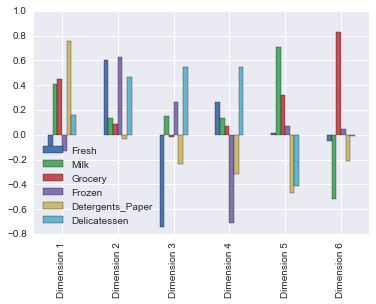

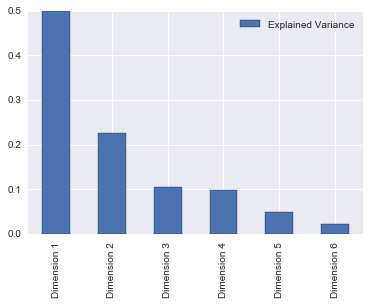

In [18]:
dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
components.index = dimensions
ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
variance_ratios.index = dimensions
components.plot(kind = 'bar')
variance_ratios.plot(kind = 'bar')

In [19]:
def pca_results(good_data, pca):
	'''
	Create a DataFrame of the PCA results
	Includes dimension feature weights and explained variance
	Visualizes the PCA results
	'''

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (14,8))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar');
	ax.set_ylabel("Feature Weights")
	ax.set_xticklabels(dimensions, rotation=0)


	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

	# Return a concatenated DataFrame
	return pd.concat([variance_ratios, components], axis = 1)


,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4993,-0.0976,0.4109,0.4511,-0.1280,0.7595,0.1579
Dimension 2,0.2259,0.6008,0.1370,0.0852,0.6300,-0.0376,0.4634
Dimension 3,0.1049,-0.7452,0.1544,-0.0204,0.2670,-0.2349,0.5422
Dimension 4,0.0978,0.2667,0.1375,0.0710,-0.7133,-0.3157,0.5445
Dimension 5,0.0488,0.0114,0.7083,0.3168,0.0671,-0.4729,-0.4120
Dimension 6,0.0233,-0.0543,-0.5177,0.8267,0.0471,-0.2080,-0.0094


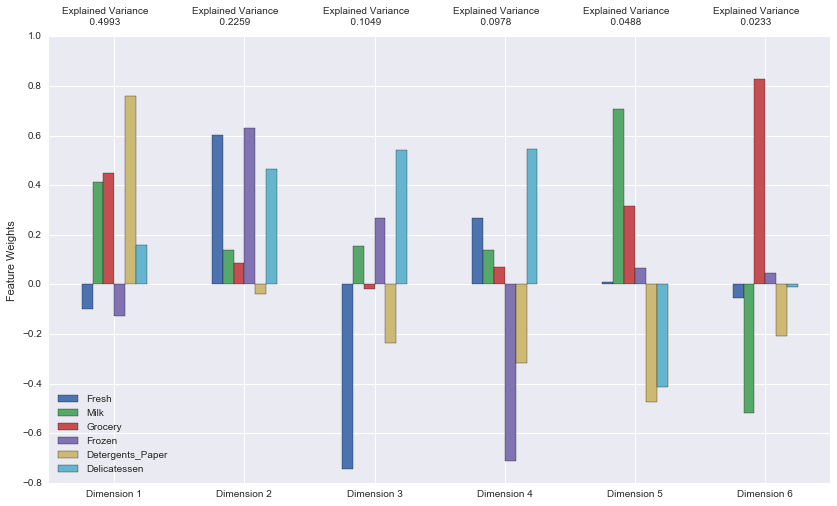

In [20]:
pca_result=pca_results(good_data, pca)
pca_result

In [21]:
pd.DataFrame(np.round(pca_samples, 4), columns = pca_result.index.values)

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.7793,-0.6604,-0.8247,1.6580,0.0903,-0.4808
1,1.8820,0.4617,0.2764,0.1055,0.0958,-0.2093
2,1.9935,1.2471,1.2157,0.6134,-0.6732,-0.3420
3,-0.9986,1.3694,0.2854,-0.3997,-0.6781,0.6194
4,0.9938,2.0783,0.2614,0.5228,-0.4987,-0.0438
5,1.1335,-0.1257,-0.1789,0.8899,0.0844,-0.5694
6,1.1701,-0.7584,-1.2700,0.3727,-0.3699,0.0399
7,1.6593,0.5459,0.3012,0.2660,-0.5509,0.1202
8,0.8467,-1.0829,-0.4359,0.6445,-0.1767,0.0290
9,2.9524,0.2223,0.1893,0.2605,-0.0849,0.1073


In [22]:
pca = PCA(n_components = 2).fit(good_data)
reduced_data = pca.transform(good_data)
reduced_data = pd.DataFrame(reduced_data,columns = ['Dimension1','Dimension2'])

In [23]:
pca.components_.T

array([[-0.09758688,  0.60077834],
       [ 0.41085006,  0.1369893 ],
       [ 0.45111781,  0.08516261],
       [-0.12804262,  0.62996118],
       [ 0.75951245, -0.03761194],
       [ 0.15785331,  0.46344461]])

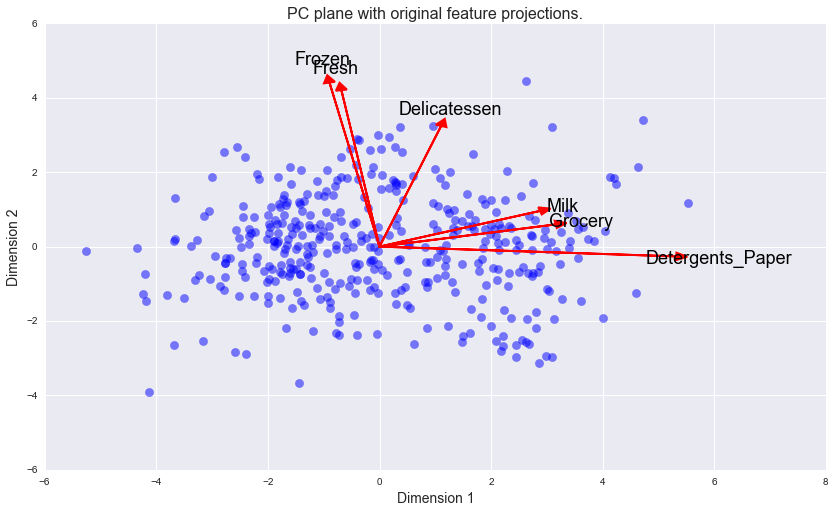

In [24]:
fig,ax = plt.subplots(figsize=(14,8))
ax.scatter(x=reduced_data.loc[:,'Dimension1'],y=reduced_data.loc[:,'Dimension2'],facecolor = 'b',edgecolor = 'b',s=70,alpha=0.5)
feature_vectors = pca.components_.T
arrow_size,text_pos = 7.0,8.0
for i,v in enumerate(feature_vectors):
    ax.arrow(0,0,arrow_size*v[0],arrow_size*v[1],head_width=0.2,head_length=0.2,linewidth=2,color='red')
    ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)
ax.set_xlabel('Dimension 1',fontsize=14)
ax.set_ylabel('Dimension 2', fontsize = 14)
ax.set_title('PC plane with original feature projections.',fontsize = 16)


In [25]:
components = pd.DataFrame(np.round(pca.components_,4),columns = good_data.columns.values)

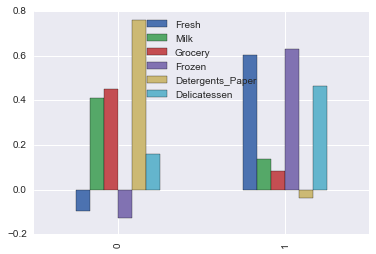

In [26]:
components.plot(kind = 'bar')

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
KMeans_scores = {}
for i in range(7):
    cluster = KMeans(n_clusters = i+2)
    cluster = cluster.fit(reduced_data)
    preds = cluster.predict(reduced_data)
    centers = cluster.cluster_centers_
    KMeans_scores[i+2] = silhouette_score(reduced_data,preds)

In [32]:
KMeans_scores

{2: 0.447157742293467,
 3: 0.36487403561180493,
 4: 0.33115095428456565,
 5: 0.3498958263567935,
 6: 0.3637123460943405,
 7: 0.35590241018035196,
 8: 0.36816522105348565}

In [33]:
from sklearn.mixture import GaussianMixture
GM_scores = {}
for i in range(7):
    cluster = GaussianMixture(n_components = i+2)
    cluster.fit(reduced_data)
    preds = cluster.predict(reduced_data)
    centers = cluster.covariances_
    GM_scores[i+2] = silhouette_score(reduced_data,preds)

In [34]:
GM_scores

{2: 0.44675352694453702,
 3: 0.35203517453916788,
 4: 0.28874757987356908,
 5: 0.31698629645643894,
 6: 0.30051758930290301,
 7: 0.26018562646103433,
 8: 0.30001081685953901}

In [67]:
cluster = KMeans(n_clusters = 2).fit(reduced_data)
pred = cluster.predict(reduced_data)
centers = cluster.cluster_centers_

In [68]:
predictions = pd.DataFrame(pred,columns = ['Cluster'])
plot_data = pd.concat([predictions,reduced_data],axis = 1)

In [69]:
plot_data.groupby(['Cluster']).first()

,Dimension1,Dimension2
Cluster,,
0,-0.998581,1.369364
1,1.779322,-0.660449


TypeError: 'AxesSubplot' object is not iterable

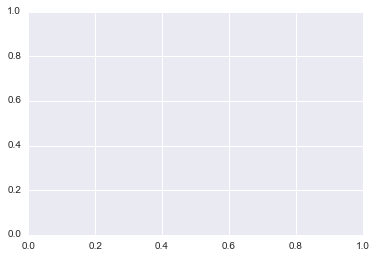

In [70]:
fig,ax = plt.subplot()
cmap = cm.get_cmap('gist_rainbow')
for i,cluster in plot_data.groupby('Cluster'):
    cluster.plot(ax=ax,kind='scatter',x='Dimension1',y='Dimension2',\
                color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30)
for i, c in enumerate(centers):
	    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
	               alpha = 1, linewidth = 2, marker = 'o', s=200);
	    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100)


In [71]:
import matplotlib.cm as cm
def cluster_results(reduced_data, preds, centers):#, pca_samples):
	'''
	Visualizes the PCA-reduced cluster data in two dimensions
	Adds cues for cluster centers and student-selected sample data
	'''

	predictions = pd.DataFrame(preds, columns = ['Cluster'])
	plot_data = pd.concat([predictions, reduced_data], axis = 1)

	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = cm.get_cmap('gist_rainbow')

	# Color the points based on assigned cluster
	for i, cluster in plot_data.groupby('Cluster'):   
	    cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension1', y = 'Dimension2', \
	                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

	# Plot centers with indicators
	for i, c in enumerate(centers):
	    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
	               alpha = 1, linewidth = 2, marker = 'o', s=200);
	    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

	# Plot transformed sample points 
	#ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
	 #          s = 150, linewidth = 4, color = 'black', marker = 'x');

	# Set plot title
	ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");



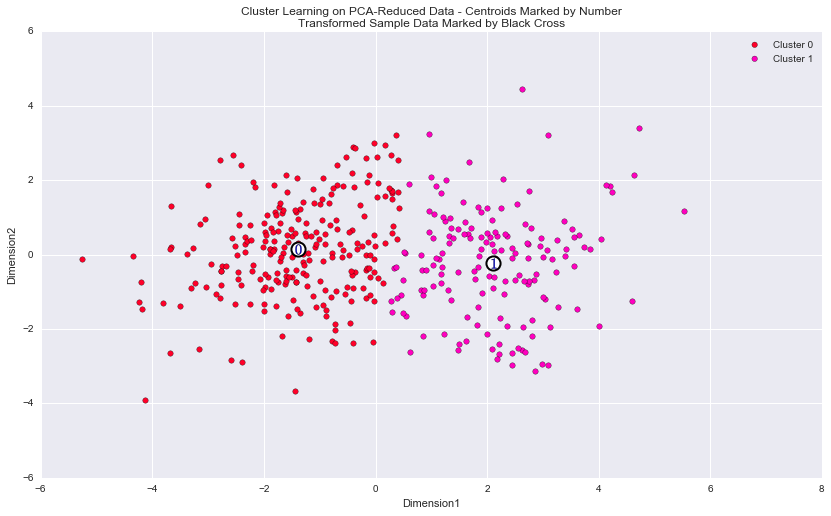

In [72]:
cluster_results(reduced_data, pred, centers)#, pca_samples)

In [75]:
cluster = GaussianMixture(n_components = 2)
cluster.fit(reduced_data)
preds = cluster.predict(reduced_data)
center = cluster.covariances_

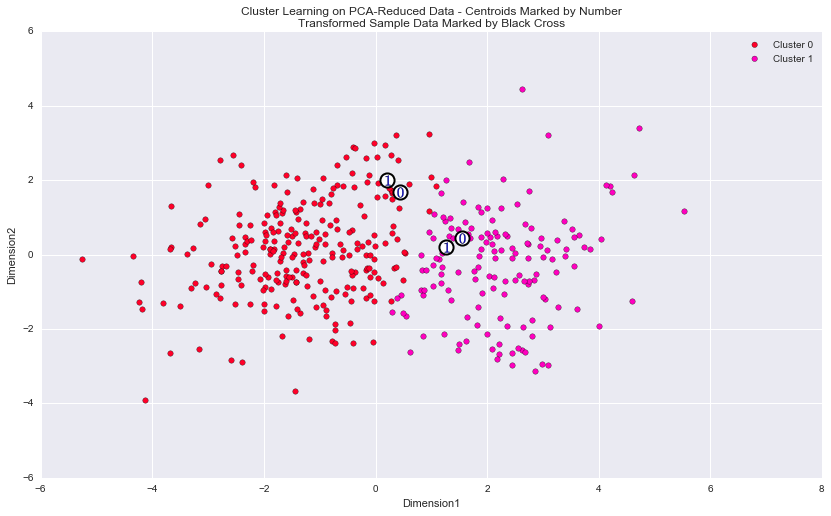

In [76]:
cluster_results(reduced_data, preds, center)#, pca_samples)